### Loading the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
data=pd.read_csv("TrainingData - Training.csv")

In [4]:
data.dtypes

Period                                 object
EQ                                    float64
Social_Search_Impressions             float64
Social_Search_Working_cost            float64
Digital_Impressions                   float64
Digital_Working_cost                  float64
Print_Impressions.Ads40               float64
Print_Working_Cost.Ads50              float64
OOH_Impressions                       float64
OOH_Working_Cost                      float64
SOS_pct                               float64
Digital_Impressions_pct               float64
CCFOT                                 float64
Median_Temp                           float64
Median_Rainfall                       float64
Fuel_Price                            float64
Inflation                             float64
Trade_Invest                          float64
Brand_Equity                          float64
Avg_EQ_Price                          float64
Any_Promo_pct_ACV                     float64
Any_Feat_pct_ACV                  

In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Period,34,34,2018 - Period:10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EQ,34,NaN,NaN,NaN,323.714,121.512,130.937,238.093,292.629,445.079,546.053
Social_Search_Impressions,24,NaN,NaN,NaN,1.22942e+07,1.02196e+07,21600,3.79002e+06,9.85739e+06,1.69532e+07,4.03974e+07
Social_Search_Working_cost,24,NaN,NaN,NaN,51957.2,42730,2006.67,20550.5,35200.7,81174.7,153277
Digital_Impressions,23,NaN,NaN,NaN,3.83392e+06,4.19566e+06,29892.2,402766,3.00659e+06,5.94667e+06,1.83005e+07
Digital_Working_cost,23,NaN,NaN,NaN,42576.9,47739.2,1800.34,5787.39,23206,68823,170508
Print_Impressions.Ads40,33,NaN,NaN,NaN,2.00868e+06,3.64076e+06,1.4e-05,1.66649e-05,2374.54,1.4493e+06,1.20585e+07
Print_Working_Cost.Ads50,33,NaN,NaN,NaN,32298.9,55891.8,1.5e-05,1.99805e-05,404.647,48695.4,207179
OOH_Impressions,10,NaN,NaN,NaN,9.93068e+08,1.29092e+09,28807.2,2.21397e+07,5.31317e+07,2.01269e+09,3.11966e+09
OOH_Working_Cost,7,NaN,NaN,NaN,3.20235e+06,3.29983e+06,350.551,191936,3.1137e+06,5.15062e+06,8.61731e+06


In [6]:
#data.drop(['Period'],axis=1,inplace=True)

In [7]:
data.shape

(34, 39)

In [8]:
na_columns=[col for col in data.columns if data[col].isnull().any()]
na_columns

['Social_Search_Impressions',
 'Social_Search_Working_cost',
 'Digital_Impressions',
 'Digital_Working_cost',
 'Print_Impressions.Ads40',
 'Print_Working_Cost.Ads50',
 'OOH_Impressions',
 'OOH_Working_Cost',
 'Digital_Impressions_pct',
 'Any_Feat_pct_ACV',
 'Any_Disp_pct_ACV',
 'Magazine_Impressions_pct',
 'TV_GRP']

In [9]:
data.isna().sum()

Period                                 0
EQ                                     0
Social_Search_Impressions             10
Social_Search_Working_cost            10
Digital_Impressions                   11
Digital_Working_cost                  11
Print_Impressions.Ads40                1
Print_Working_Cost.Ads50               1
OOH_Impressions                       24
OOH_Working_Cost                      27
SOS_pct                                0
Digital_Impressions_pct               24
CCFOT                                  0
Median_Temp                            0
Median_Rainfall                        0
Fuel_Price                             0
Inflation                              0
Trade_Invest                           0
Brand_Equity                           0
Avg_EQ_Price                           0
Any_Promo_pct_ACV                      0
Any_Feat_pct_ACV                      23
Any_Disp_pct_ACV                      12
EQ_Base_Price                          0
Est_ACV_Selling 

### Replace missing values by mean and drop columns where nearly or more than 30 percent values are missing

In [10]:
mean_PIA_40=data['Print_Impressions.Ads40'].mean()
mean_PWCA_50=data['Print_Working_Cost.Ads50'].mean()

In [11]:
data['Print_Impressions.Ads40']=data['Print_Impressions.Ads40'].replace(np.nan,mean_PIA_40)
data['Print_Working_Cost.Ads50']=data['Print_Working_Cost.Ads50'].replace(np.nan,mean_PWCA_50)

In [12]:
[col for col in data.columns if data[col].isnull().any()]

['Social_Search_Impressions',
 'Social_Search_Working_cost',
 'Digital_Impressions',
 'Digital_Working_cost',
 'OOH_Impressions',
 'OOH_Working_Cost',
 'Digital_Impressions_pct',
 'Any_Feat_pct_ACV',
 'Any_Disp_pct_ACV',
 'Magazine_Impressions_pct',
 'TV_GRP']

In [13]:
data_new=data.dropna(axis='columns')

In [14]:
data_new.head()

,Period,EQ,Print_Impressions.Ads40,Print_Working_Cost.Ads50,SOS_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,...,pct_PromoMarketDollars_Category,RPI_Category,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,2.008683e+06,32298.947990,7.446883,100.0,32.950,0.5150,8.226,0.013258,...,0.0339,35.817030,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,1.400000e-05,0.000015,11.677082,87.5,34.625,0.2700,7.473,0.009938,...,0.0391,36.389065,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,1.560000e-05,0.000017,0.102858,96.0,46.700,0.3900,8.001,0.007832,...,0.0228,36.599984,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,1.624000e-05,0.000019,0.249055,100.0,49.650,0.3500,8.767,0.010034,...,0.0147,38.201852,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,1.649600e-05,0.000019,13.338804,100.0,58.100,0.5025,9.277,0.009546,...,0.0219,38.648805,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [15]:
data_new.drop(['Period'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
data_new.columns

Index(['EQ', 'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50', 'SOS_pct',
       'CCFOT', 'Median_Temp', 'Median_Rainfall', 'Fuel_Price', 'Inflation',
       'Trade_Invest', 'Brand_Equity', 'Avg_EQ_Price', 'Any_Promo_pct_ACV',
       'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV', 'Avg_no_of_Items',
       'pct_PromoMarketDollars_Category', 'RPI_Category', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory'],
      dtype='object')

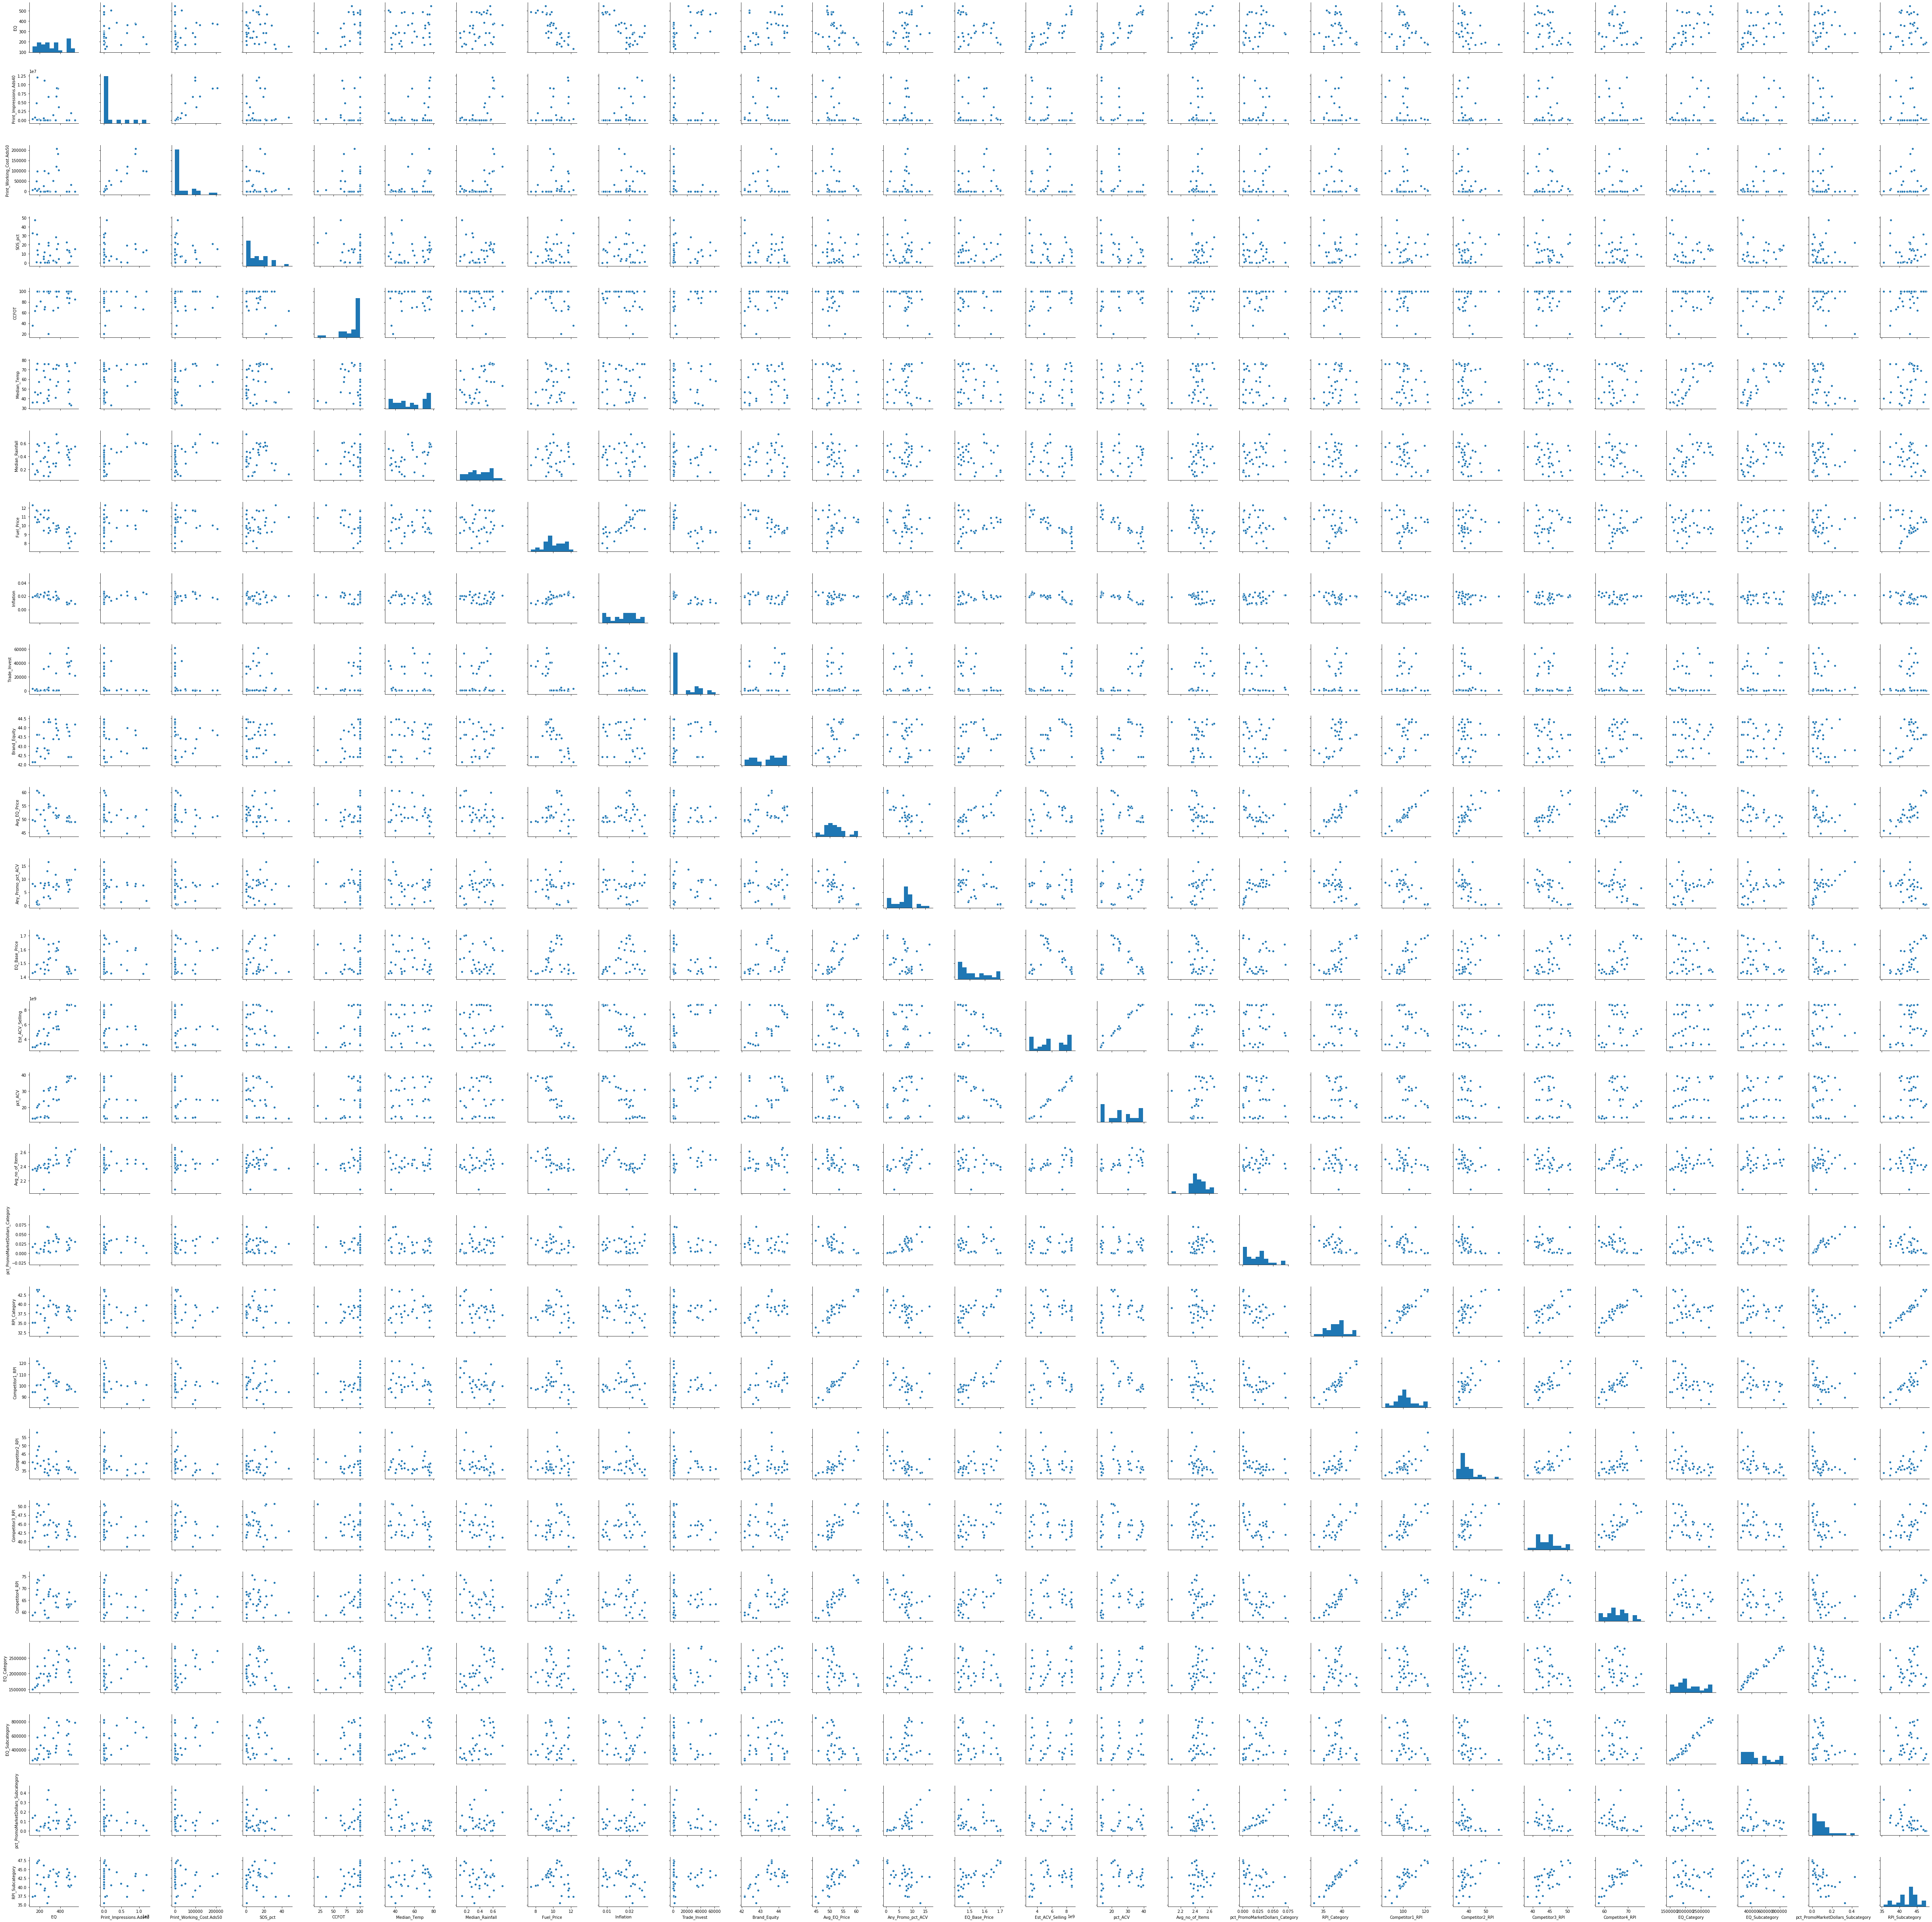

In [17]:
sns.pairplot(data_new)

[Text(0.5, 0, 'EQ'),
 Text(2.5, 0, 'Print_Working_Cost.Ads50'),
 Text(4.5, 0, 'CCFOT'),
 Text(6.5, 0, 'Median_Rainfall'),
 Text(8.5, 0, 'Inflation'),
 Text(10.5, 0, 'Brand_Equity'),
 Text(12.5, 0, 'Any_Promo_pct_ACV'),
 Text(14.5, 0, 'Est_ACV_Selling'),
 Text(16.5, 0, 'Avg_no_of_Items'),
 Text(18.5, 0, 'RPI_Category'),
 Text(20.5, 0, 'Competitor2_RPI'),
 Text(22.5, 0, 'Competitor4_RPI'),
 Text(24.5, 0, 'EQ_Subcategory'),
 Text(26.5, 0, 'RPI_Subcategory')]

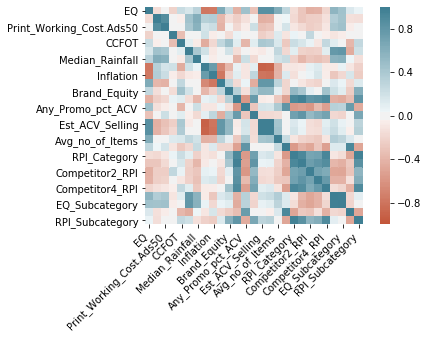

In [18]:
corr = data_new.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1,center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [19]:
x_data=data_new[['Print_Impressions.Ads40', 'Print_Working_Cost.Ads50', 'SOS_pct',
       'CCFOT', 'Median_Temp', 'Median_Rainfall', 'Fuel_Price', 'Inflation',
       'Trade_Invest', 'Brand_Equity', 'Avg_EQ_Price', 'Any_Promo_pct_ACV',
       'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV', 'Avg_no_of_Items',
       'pct_PromoMarketDollars_Category', 'RPI_Category', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory']]
y_data=data_new['EQ']

In [20]:
data_new.describe(percentiles = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]).T

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,100%,max
EQ,34.0,3.237141e+02,1.215124e+02,1.309374e+02,1.309374e+02,1.738958e+02,2.006203e+02,2.443614e+02,2.838746e+02,2.926294e+02,3.572494e+02,3.790003e+02,4.706524e+02,4.886968e+02,4.953219e+02,5.324346e+02,5.460531e+02,5.460531e+02
Print_Impressions.Ads40,34.0,2.008683e+06,3.585173e+06,1.400000e-05,1.400000e-05,1.652672e-05,1.665968e-05,1.666635e-05,7.598532e+01,4.155446e+03,2.040621e+05,8.395013e+05,4.103320e+06,8.232681e+06,9.777457e+06,1.174660e+07,1.205852e+07,1.205852e+07
Print_Working_Cost.Ads50,34.0,3.229895e+04,5.503839e+04,1.500000e-05,1.500000e-05,1.946875e-05,1.994531e-05,1.999463e-05,2.023236e+01,6.069703e+02,6.396865e+03,2.653755e+04,6.594148e+04,1.021270e+05,1.423197e+05,1.989062e+05,2.071792e+05,2.071792e+05
SOS_pct,34.0,1.192692e+01,1.154759e+01,1.028581e-01,1.028581e-01,2.635577e-01,5.275276e-01,2.643134e+00,7.050035e+00,1.040452e+01,1.351753e+01,1.538482e+01,2.111238e+01,2.685041e+01,3.189945e+01,4.263681e+01,4.744219e+01,4.744219e+01
CCFOT,34.0,8.718739e+01,1.965339e+01,2.000000e+01,2.000000e+01,6.468858e+01,7.151398e+01,8.427885e+01,9.120000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Median_Temp,34.0,5.652500e+01,1.536585e+01,3.295000e+01,3.295000e+01,3.598750e+01,4.053000e+01,4.571500e+01,4.941000e+01,5.730000e+01,6.195500e+01,7.028500e+01,7.392000e+01,7.582000e+01,7.606000e+01,7.705300e+01,7.735000e+01,7.735000e+01
Median_Rainfall,34.0,3.926471e-01,1.699386e-01,9.500000e-02,9.500000e-02,1.615000e-01,2.445000e-01,2.895000e-01,3.340000e-01,3.925000e-01,4.640000e-01,5.037500e-01,5.570000e-01,5.970000e-01,6.126250e-01,6.995750e-01,7.400000e-01,7.400000e-01
Fuel_Price,34.0,1.009379e+01,1.158548e+00,7.473000e+00,7.473000e+00,8.881300e+00,9.256200e+00,9.460000e+00,9.665200e+00,9.901500e+00,1.035560e+01,1.075180e+01,1.106780e+01,1.170650e+01,1.175020e+01,1.212034e+01,1.228600e+01,1.228600e+01
Inflation,34.0,1.750207e-02,5.659181e-03,7.832481e-03,7.832481e-03,9.367129e-03,1.062662e-02,1.488253e-02,1.673720e-02,1.863855e-02,2.012090e-02,2.080862e-02,2.182000e-02,2.422871e-02,2.609331e-02,2.682829e-02,2.688364e-02,2.688364e-02
Trade_Invest,34.0,1.555812e+04,1.984580e+04,3.654300e+02,3.654300e+02,5.773900e+02,7.783340e+02,9.013390e+02,1.062620e+03,1.625310e+03,4.341462e+03,2.599722e+04,3.552818e+04,4.220470e+04,5.336269e+04,5.902274e+04,6.167532e+04,6.167532e+04


### Outlier Treatment

In [21]:
x_data = x_data.div(x_data.quantile(.99)).clip_upper(1)
print (x_data)

    Print_Impressions.Ads40  Print_Working_Cost.Ads50   SOS_pct     CCFOT  \
0              1.710012e-01              1.623828e-01  0.174659  1.000000   
1              1.191834e-12              7.541245e-11  0.273873  0.875000   
2              1.328044e-12              8.798119e-11  0.002412  0.960000   
3              1.382528e-12              9.426556e-11  0.005841  1.000000   
4              1.404321e-12              9.740775e-11  0.312847  1.000000   
5              1.413039e-12              9.897884e-11  0.318087  0.785714   
6              1.416526e-12              9.976438e-11  0.337556  0.880000   
7              1.417920e-12              1.001572e-10  0.360630  0.846154   
8              1.418478e-12              1.003535e-10  0.537858  1.000000   
9              1.418702e-12              1.004517e-10  0.669128  1.000000   
10             1.418791e-12              1.005008e-10  0.193099  1.000000   
11             1.418826e-12              1.005254e-10  0.053932  1.000000   

### Train Test Split & Standizing x variable/regressor variable

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=0)

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Fitting Random Forest Regressor Model

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [50]:
m=[]
rmse_test=[]
n=range(4,500)
for n in n:
    regressor=RandomForestRegressor(n_estimators=n,min_samples_leaf=1,n_jobs=-1,oob_score=True,random_state=0)
    regressor.fit(x_train,y_train)
    y_pred_test=regressor.predict(x_test)
    m.append(n)
    rmse_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

In [51]:
m=pd.DataFrame(m)
rmse_test=pd.DataFrame(rmse_test)
f_results=pd.concat([m,rmse_test], axis=1, ignore_index=True)
f_results.columns=['Number of Trees','Root Mean Square Error Test Set']

In [52]:
f_results.sort_values(by='Root Mean Square Error Test Set', ascending=True).head()

,Number of Trees,Root Mean Square Error Test Set
10,14,17.481330
13,17,17.589577
86,90,17.729917
66,70,17.736798
87,91,17.765746


### Feature Importance of the variables

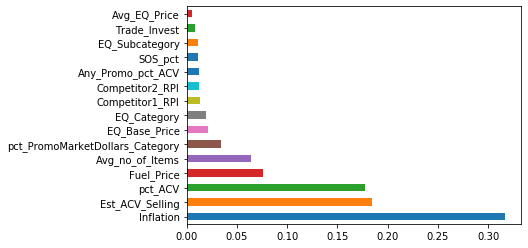

In [53]:
feat_importances = pd.Series(regressor.feature_importances_, index=x_data.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [54]:
feat_importances.nlargest(15)

Inflation                          0.317090
Est_ACV_Selling                    0.184234
pct_ACV                            0.177660
Fuel_Price                         0.076064
Avg_no_of_Items                    0.063875
pct_PromoMarketDollars_Category    0.033747
EQ_Base_Price                      0.021380
EQ_Category                        0.018908
Competitor1_RPI                    0.013664
Competitor2_RPI                    0.012801
Any_Promo_pct_ACV                  0.012405
SOS_pct                            0.011809
EQ_Subcategory                     0.011473
Trade_Invest                       0.008373
Avg_EQ_Price                       0.005561
dtype: float64

### Correlation Matrix for x variables / regressor variables

In [55]:
x_data.corr()[1:13].T


,Print_Working_Cost.Ads50,SOS_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,EQ_Base_Price
Print_Impressions.Ads40,0.885577,0.029569,-0.041813,0.456273,0.615080,0.345791,0.365865,-0.389682,-0.144080,-0.239130,-0.122228,-0.001797
Print_Working_Cost.Ads50,1.000000,0.023169,-0.028270,0.413013,0.578525,0.189840,0.239799,-0.411186,-0.033238,-0.187004,-0.048389,0.218488
SOS_pct,0.023169,1.000000,-0.345078,0.033264,0.006132,0.192774,-0.068115,-0.028801,-0.133445,0.078455,0.000841,0.002683
CCFOT,-0.028270,-0.345078,1.000000,0.105169,-0.070668,-0.440675,-0.183333,0.285497,0.459858,0.115414,-0.371729,0.111847
Median_Temp,0.413013,0.033264,0.105169,1.000000,0.424312,0.212518,-0.083105,-0.001996,0.194645,-0.153707,-0.027724,-0.040056
Median_Rainfall,0.578525,0.006132,-0.070668,0.424312,1.000000,0.054078,-0.056557,-0.021381,-0.039944,-0.386004,0.225432,-0.171430
Fuel_Price,0.189840,0.192774,-0.440675,0.212518,0.054078,1.000000,0.756511,-0.679715,-0.372351,0.077900,-0.110730,0.101325
Inflation,0.239799,-0.068115,-0.183333,-0.083105,-0.056557,0.756511,1.000000,-0.775554,-0.220669,0.116433,-0.094475,0.294171
Trade_Invest,-0.411186,-0.028801,0.285497,-0.001996,-0.021381,-0.679715,-0.775554,1.000000,0.294169,-0.170858,0.055983,-0.442853
Brand_Equity,-0.033238,-0.133445,0.459858,0.194645,-0.039944,-0.372351,-0.220669,0.294169,1.000000,0.344549,-0.122353,0.384126


In [56]:
x_data.corr()[14:26].T

,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
Print_Impressions.Ads40,-0.410766,-0.021475,0.045208,-0.179180,-0.296648,-0.251578,-0.242524,-0.133339,0.367282,0.441200,-0.124582,-0.148486
Print_Working_Cost.Ads50,-0.296768,0.028772,0.180125,-0.097858,-0.163087,-0.256427,-0.217307,-0.091658,0.410616,0.467771,-0.048446,-0.027150
SOS_pct,-0.176664,0.131848,-0.111153,0.071753,0.042714,0.289360,0.025595,-0.029154,-0.088722,-0.043855,-0.040242,0.012690
CCFOT,0.371885,0.148364,-0.271230,0.230504,0.162546,0.060614,-0.096051,0.280148,0.111316,0.030949,-0.358731,0.277197
Median_Temp,-0.028794,0.284871,-0.185558,0.106291,-0.213735,-0.224939,-0.219076,0.107923,0.787306,0.797528,-0.452935,0.218132
Median_Rainfall,-0.003774,0.196933,0.246431,-0.222050,-0.388982,-0.286669,-0.322546,-0.274323,0.580794,0.599704,0.031959,-0.115129
Fuel_Price,-0.897644,-0.425945,-0.095525,-0.088669,-0.070388,0.085454,0.125857,-0.063239,-0.059617,0.071566,-0.106954,-0.216612
Inflation,-0.820046,-0.405009,0.138689,-0.122397,0.018642,0.048595,0.161397,-0.053173,-0.282238,-0.184164,0.163150,-0.252138
Trade_Invest,0.793968,0.310979,-0.188994,0.021665,-0.086529,-0.169247,-0.202738,-0.029911,0.140015,0.054190,-0.167674,0.125304
Brand_Equity,0.523187,0.086835,-0.198729,0.527441,0.416680,0.091844,-0.008592,0.441804,0.215215,0.112376,-0.251832,0.602656


### After Checking Variable Importance and Correlation Matrix we select the following list of regressor variables

In [57]:
x_data_new=x_data[['Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price']]

In [58]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_data_new,y_data,test_size=0.20,random_state=0)

In [59]:
x_train_new = sc.fit_transform(x_train_new)
x_test_new = sc.transform(x_test_new)

In [61]:
m_new=[]
rmse_test_new=[]
n_new=range(4,500)
for n in n_new:
    regressor=RandomForestRegressor(n_estimators=n,min_samples_leaf=1,n_jobs=-1,oob_score=True,random_state=0)
    regressor.fit(x_train_new,y_train_new)
    y_pred_test_new=regressor.predict(x_test_new)
    m_new.append(n)
    rmse_test_new.append(np.sqrt(mean_squared_error(y_test_new,y_pred_test_new)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

In [62]:
m_new=pd.DataFrame(m_new)
rmse_test_new=pd.DataFrame(rmse_test_new)
f_results_new=pd.concat([m_new,rmse_test_new], axis=1, ignore_index=True)
f_results_new.columns=['Number of Trees','Root Mean Square Error Testing']

In [63]:
f_results_new.sort_values(by='Root Mean Square Error Testing', ascending=True).head()

,Number of Trees,Root Mean Square Error Testing
139,143,19.739109
138,142,19.765413
141,145,19.770613
133,137,19.779478
134,138,19.812563


## Testing Data Set

In [64]:
test_data=pd.read_csv('TestData - Test.csv')

In [65]:
[col for col in test_data.columns if test_data[col].isnull().any()]

['Digital_Impressions',
 'Digital_Working_cost',
 'OOH_Impressions',
 'OOH_Working_Cost',
 'Digital_Impressions_pct',
 'Any_Feat_pct_ACV',
 'Any_Disp_pct_ACV',
 'Magazine_Impressions_pct',
 'TV_GRP']

In [66]:
test_data=test_data.drop(['Period','Social_Search_Impressions',
 'Social_Search_Working_cost',
 'Digital_Impressions',
 'Digital_Working_cost',
 'Print_Impressions.Ads40',
 'Print_Working_Cost.Ads50',
 'OOH_Impressions',
 'OOH_Working_Cost',
 'Digital_Impressions_pct',
 'Any_Feat_pct_ACV',
 'Any_Disp_pct_ACV',
 'Magazine_Impressions_pct',
 'TV_GRP'],axis=1)

In [67]:
x_validation=test_data[['Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price']]
y_validation_actual=test_data['EQ']

In [68]:
x_validation = x_validation.div(x_validation.quantile(.99)).clip_upper(1)

In [69]:
x_validation = sc.transform(x_validation)

In [70]:
regressor=RandomForestRegressor(n_estimators=143,min_samples_leaf=1,n_jobs=-1,oob_score=True,random_state=0)
regressor.fit(x_train_new,y_train_new)
y_pred_validation=regressor.predict(x_validation)

In [72]:
print("Root Mean Squared Error is:",np.sqrt(mean_squared_error(y_validation_actual,y_pred_validation)))

Root Mean Squared Error is: 26.37788780495046


#### Comment : The root mean square error of the validation set is 26.378 which is really good.

## Let's move on to Time Series Forecasting Model

In [73]:
data.shape

(34, 39)

In [74]:
data_xreg1= pd.DataFrame(data=data, columns=['Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price'])
data_xreg2=pd.DataFrame(data=test_data,columns=['Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price'])

data_xreg_Final=data_xreg1.append(data_xreg2)

In [75]:
data_xreg_Final.head()

,Inflation,Est_ACV_Selling,pct_ACV,Fuel_Price,Avg_no_of_Items,pct_PromoMarketDollars_Category,EQ_Base_Price,EQ_Category,Competitor1_RPI,Competitor2_RPI,Any_Promo_pct_ACV,SOS_pct,EQ_Subcategory,Trade_Invest,Avg_EQ_Price
0,0.013258,8696587915,39.441025,8.226,2.611782,0.0339,1.427532,1728388.673,97.173365,35.557371,9.691794,7.446883,331927.5394,42744.25684,49.091447
1,0.009938,8682307085,38.417224,7.473,2.522814,0.0391,1.442716,1900859.879,97.850760,37.223072,9.415938,11.677082,334611.3806,36290.43956,49.057612
2,0.007832,8706897549,36.499442,8.001,2.477322,0.0228,1.423408,2036436.906,96.397739,40.800563,5.176684,0.102858,387148.3582,34852.14166,49.367514
3,0.010034,8660288592,38.135159,8.767,2.520409,0.0147,1.443401,2113635.013,98.936519,36.576140,6.088273,0.249055,482489.6740,24869.55899,50.657634
4,0.009546,8644518558,38.629564,9.277,2.497285,0.0219,1.473687,2402211.102,100.509969,36.032016,7.827112,13.338804,629826.6484,61675.32162,50.625777


In [76]:
data_yreg1=pd.DataFrame(data=data, columns=['Period','EQ'])
data_yreg2=pd.DataFrame(data=test_data, columns=['Period','EQ'])
data_yreg_Final=data_yreg1.append(data_yreg2)

In [77]:
data_yreg_Final.head()

,Period,EQ
0,2016 - Period:1,504.784933
1,2016 - Period:2,490.226477
2,2016 - Period:3,479.244686
3,2016 - Period:4,489.057428
4,2016 - Period:5,477.031994


In [78]:
data_ARIMAX=pd.concat([data_yreg_Final,data_xreg_Final], axis=1, ignore_index=True)

In [79]:
data_ARIMAX= pd.DataFrame(data=data, columns=['Period','EQ','Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price'])

In [80]:
data_ARIMAX.shape

(34, 17)

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler=MinMaxScaler()

In [83]:
scaler.fit(data[['EQ','Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price']])



d=scaler.transform(data[['EQ','Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price']])

In [84]:
d=pd.DataFrame(d,columns=['EQ','Inflation',
'Est_ACV_Selling',
'pct_ACV',
'Fuel_Price',
'Avg_no_of_Items',
'pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI',
'Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct',
'EQ_Subcategory',
'Trade_Invest',
'Avg_EQ_Price'])

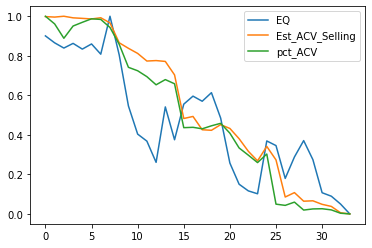

In [85]:
d[['EQ','Est_ACV_Selling',
'pct_ACV']].plot()
plt.show()

#### We can clearly observe how the changes in Est_ACV_Selling and pct_ACV brings about a change in EQ in the same direction with certain time lags

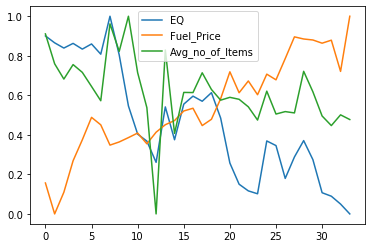

In [86]:
d[['EQ','Fuel_Price',
'Avg_no_of_Items']].plot()
plt.show()

#### As fuel price increases over time EQ in the same manner tends to decrease over time.Thereby showing a particular trend in the opposite direction whereas Avg_no_of_Items over time doesn't show any significant trend

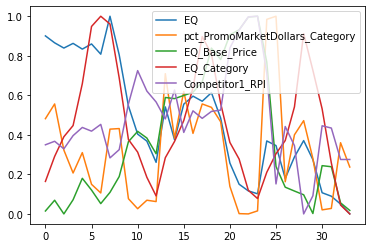

In [87]:
d[['EQ','pct_PromoMarketDollars_Category',
'EQ_Base_Price',
'EQ_Category',
'Competitor1_RPI']].plot()
plt.show()

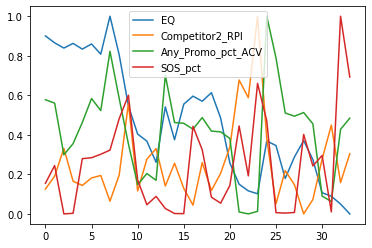

In [88]:
d[['EQ','Competitor2_RPI',
'Any_Promo_pct_ACV',
'SOS_pct']].plot()
plt.show()

In [89]:
from scipy.misc import factorial

ImportError: cannot import name 'factorial'

In [90]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(d['EQ'])

ImportError: cannot import name 'factorial'

### Next Steps : I had thought of performing the Augmented Dicky Fuller Test (null hypothesis: The series is sationary,alternative hypothesis: the series is  not stationary) to check whether the series is stationary or not over time.If not I would have differenced the series and took the corresponding lags of the variables for ehich the series become stationary. I would then use the corresponding lags of the variables as the regressor variables in my ARIMA model and similar checks of stationarity I would do for my forecast variable. With the help of the ACF(Auto Correlation Function)plot I would get MA(Moving Average) order i.e. under which lag correlation between the event at time point 't' and time point 't-1' crosses +1 or -1 for the first time,similarly AR(Auto Regressive) order can be found from the Partial autocorrelation function (PACF) plot where we calculate the corrletaion of the event happening at time point t with respect to time point 't-1' keeping all the time points till 't-2' as constant.After we have run an ARIMAX model finally we will try to see the goodness of fit of the model with a part of the existing data (as in we forecast for the latest few time points of our existing data with respect to the model fit based on time points in the recent past).Then we calculate the MAPE(Mean Absolute Percentage Error) of the model.Generally a good value of MAPE should not be avove 15 percent.

In [561]:
a=['ABC','DEF']
b=['DEF','ABC']
print(id(a)==id(b))
id(a)

False


2105712674440

In [562]:
id(b)

2105712825672

In [547]:
[n*n for n in range(3)]

[0, 1, 4]

In [548]:
def to_upper(k):
    return k.upper()

In [549]:
x=['ab','cd']
print(list(map(to_upper,x)))

['AB', 'CD']


In [552]:
prime=[5,2,13,7,11,2,19]
prime.pop(2),

(13,)

In [557]:
d=[13,"2",'hello',3]
d.dtype()

AttributeError: 'list' object has no attribute 'dtype'